<a href="https://colab.research.google.com/github/enad999/data-analytics-portfolio/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# تحميل البيانات
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# النظرة الأولى
train.head(), train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
 2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
 3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   
 
   YrSold  SaleType  SaleCondition  SalePrice  
 0   2

In [ ]:
# عدد القيم المفقودة في كل عمود
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [ ]:
# Make a copy of the training data to avoid modifying the original dataset
df = train.copy()

# ① Fill missing values in categorical columns with the label "None"
# These features represent the absence of a category (e.g., no pool, no alley, no fence, etc.)
cols_fill_none = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
    'MasVnrType'
]
for col in cols_fill_none:
    if col in df.columns:
        df[col] = df[col].fillna('None')

# ② Fill missing numeric values with the median
# Median is more robust than mean in case of outliers
cols_numeric_median = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for col in cols_numeric_median:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# ③ Fill the few missing values in 'Electrical' using mode
# Mode is used because it's a categorical variable with a dominant class
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

# Check that no missing values remain in the dataset
df.isnull().sum().sum()

np.int64(0)

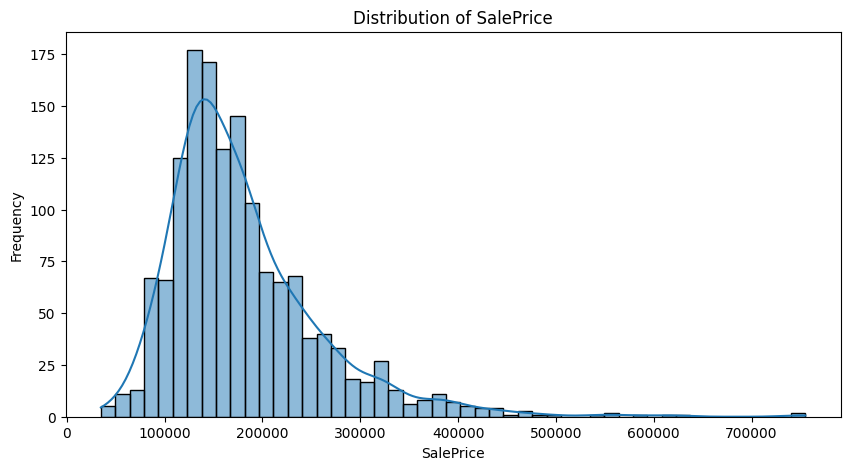

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable SalePrice
plt.figure(figsize=(10, 5))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

Top 15 features correlated with SalePrice:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
GarageYrBlt     0.466754
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


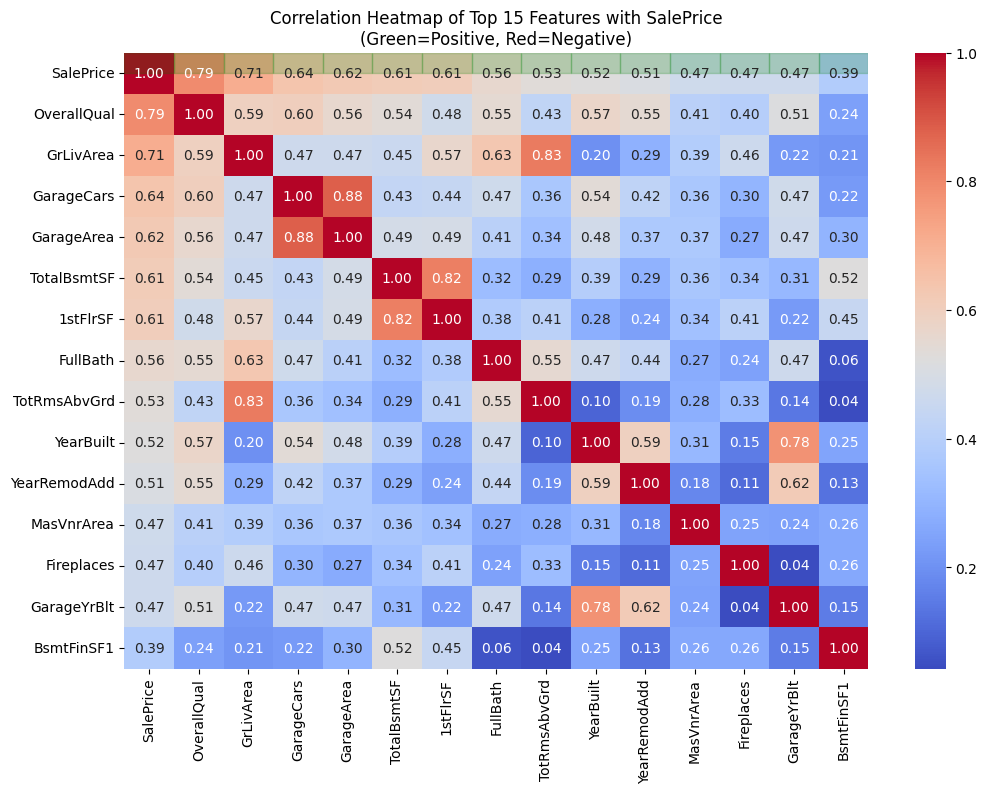


Summary of relationships with SalePrice:
SalePrice: Positive correlation (r = 1.00)
OverallQual: Positive correlation (r = 0.79)
GrLivArea: Positive correlation (r = 0.71)
GarageCars: Positive correlation (r = 0.64)
GarageArea: Positive correlation (r = 0.62)
TotalBsmtSF: Positive correlation (r = 0.61)
1stFlrSF: Positive correlation (r = 0.61)
FullBath: Positive correlation (r = 0.56)
TotRmsAbvGrd: Positive correlation (r = 0.53)
YearBuilt: Positive correlation (r = 0.52)
YearRemodAdd: Positive correlation (r = 0.51)
MasVnrArea: Positive correlation (r = 0.47)
Fireplaces: Positive correlation (r = 0.47)
GarageYrBlt: Positive correlation (r = 0.47)
BsmtFinSF1: Positive correlation (r = 0.39)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Make a copy of the dataset to avoid modifying the original
df_encoded = df.copy()

# Convert all categorical (text) columns to numeric using Label Encoding
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Compute the correlation matrix for all numerical features
corr = df_encoded.corr()

# Select the top 15 features most correlated with SalePrice
top_features = corr['SalePrice'].sort_values(ascending=False).head(15)
print("Top 15 features correlated with SalePrice:\n", top_features)

# Create correlation matrix for the top 15 features only
top_corr = df_encoded[top_features.index].corr()

# Create a custom color map for positive (green) and negative (red) correlations with SalePrice
# All correlations with SalePrice > 0 will be green, < 0 will be red, else gray
colors = []
for col in top_corr.columns:
    if top_corr['SalePrice'][col] > 0:
        colors.append('green')
    elif top_corr['SalePrice'][col] < 0:
        colors.append('red')
    else:
        colors.append('gray')

# Plot Heatmap with color annotations for positive/negative correlation
plt.figure(figsize=(12, 8))
sns.heatmap(top_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Overlay colored bars to indicate positive/negative correlation with SalePrice
for idx, col in enumerate(top_corr.columns):
    plt.gca().add_patch(plt.Rectangle((idx, 0), 1, 0.5, fill=True, color=colors[idx], alpha=0.2))
plt.title("Correlation Heatmap of Top 15 Features with SalePrice\n(Green=Positive, Red=Negative)")
plt.show()

# Print summary of each feature's relationship with SalePrice
print("\nSummary of relationships with SalePrice:")
for col in top_corr.columns:
    relation = "Positive" if top_corr['SalePrice'][col] > 0 else "Negative"
    print(f"{col}: {relation} correlation (r = {top_corr['SalePrice'][col]:.2f})")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select the most important features for training (top 15 features)
features = top_features.index.drop('SalePrice')  # Remove SalePrice from features
X = df_encoded[features]
y = df_encoded['SalePrice']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# Linear Regression Model
# ----------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression:")
print(f"RMSE = {rmse_lr:.2f}")
print(f"R² = {r2_lr:.2f}")

# ----------------------------
# Random Forest Regression Model
# ----------------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Regression:")
print(f"RMSE = {rmse_rf:.2f}")
print(f"R² = {r2_rf:.2f}")

Linear Regression:
RMSE = 38027.16
R² = 0.81

Random Forest Regression:
RMSE = 29702.46
R² = 0.88


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# ----------------------------
# 1. Load test data
# ----------------------------
test = pd.read_csv('/content/test.csv')  # Path to your test dataset

# Make a copy to avoid modifying the original
test_encoded = test.copy()

# ----------------------------
# 2. Handle missing values in test data
# Same strategy as training data
# ----------------------------
cols_fill_none = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
    'MasVnrType'
]
for col in cols_fill_none:
    if col in test_encoded.columns:
        test_encoded[col] = test_encoded[col].fillna('None')

cols_numeric_median = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for col in cols_numeric_median:
    if col in test_encoded.columns:
        test_encoded[col] = test_encoded[col].fillna(test_encoded[col].median())

if 'Electrical' in test_encoded.columns:
    test_encoded['Electrical'] = test_encoded['Electrical'].fillna(test_encoded['Electrical'].mode()[0])

# ----------------------------
# 3. Encode categorical columns
# ----------------------------
for col in test_encoded.select_dtypes(include=['object']).columns:
    test_encoded[col] = LabelEncoder().fit_transform(test_encoded[col].astype(str))

# ----------------------------
# 4. Select the same features used in training
# Assume 'features' contains the top features from training
# ----------------------------
X_test_final = test_encoded[features]  # features from previous step in training

# ----------------------------
# 5. Load or reuse trained Random Forest model
# ----------------------------
# rf_model was trained on training data previously
y_pred_test = rf_model.predict(X_test_final)

# ----------------------------
# 6. Save predictions to CSV
# ----------------------------
submission = pd.DataFrame({
    'Id': test_encoded['Id'],  # assuming 'Id' column exists
    'SalePrice': y_pred_test
})
submission.to_csv('predictions.csv', index=False)

print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv
